<a href="https://colab.research.google.com/github/dtee1/ELG5255-Applied-Machine-Learning/blob/dev/Final_Project/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, f_regression
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from torch.nn.modules.activation import ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.base import clone
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
import torch
import warnings
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'Applied_Machine_Learning_Final_Project')
drive.mount(MOUNTPOINT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Load the DUMD test and train dataset 
def loadDataset(): 
  path=os.path.join(DATADIR, 'MCSDatasetNEXTCONLab.csv')
  dataset = pd.read_csv(path)
  return dataset

In [3]:
# This function prepares the test and train dataset 
# 75% of the dataset is used for training and 25% is used for testing 
def prepareDataset(feature,result):
  dataset = loadDataset()
  x = dataset[feature]
  y = dataset[result]
  X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.1718,shuffle=False)
  return X_train,X_test,y_train,y_test,dataset

In [ ]:
def plot_tsne(X, y,name):
  tsne = TSNE(n_components=2, random_state=0)
  plt = tsne.fit_transform(X)
  df = pd.DataFrame(plt)
  df['y'] = y
  df.columns = ['x_1','x_2','y']

  sns.scatterplot(x="x_2", y="x_1", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="2D TSNE plot for " + name)  

In [26]:
def plotEstimator(trX, trY, teX, teY, estimator, title=''):
  estimator = clone(estimator).fit(trX, trY)
  h = .02
  x_min, x_max = teX.values[:, 0].min() - .5, teX.values[:, 0].max() + .5
  y_min, y_max = teX.values[:, 1].min() - .5, teX.values[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  plt.title(title)
  plt.show()

In [ ]:
class AutoEncoder(torch.nn.Module):
  def __init__(self):
    super().__init__()
    # Building a linear encoder with Linear
    # layer followed by Relu activation function
    self.encoder = torch.nn.Sequential(
        torch.nn.Linear(11, 256),
        torch.nn.BatchNorm1d(256),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(256, 128),
        torch.nn.BatchNorm1d(128),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(128, 64),
        torch.nn.BatchNorm1d(64),
        torch.nn.Linear(64, 32),
        torch.nn.BatchNorm1d(32),
        torch.nn.Linear(32, 16),
        torch.nn.BatchNorm1d(16),
        torch.nn.Linear(16, 5),
        torch.nn.LeakyReLU(),
    )
    # Building an linear decoder with Linear
    self.decoder = torch.nn.Sequential(
        torch.nn.Linear(5, 16),
        torch.nn.BatchNorm1d(16),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(16, 32),
        torch.nn.BatchNorm1d(32),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(32, 64),
        torch.nn.BatchNorm1d(64),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(64, 128),
        torch.nn.BatchNorm1d(128),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(128, 256),
        torch.nn.BatchNorm1d(256),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(256, 11),
        )
  def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      
      return decoded


**Question 1: Best Baseline Performance Using:
            KNN Classifer 
            Logistic Regression 
            SVM
            Decision Tree Classifier 
            Naive Bayes Classifier**

Accuracy of Logistic Regression model: 86.943%
[[   0  325]
 [   0 2164]]
Accuracy of KNN model: 83.206%
[[  97  228]
 [ 190 1974]]
Accuracy of SVM model: 86.943%
[[   0  325]
 [   0 2164]]
Accuracy of Decision Tree model: 92.768%
[[ 227   98]
 [  82 2082]]


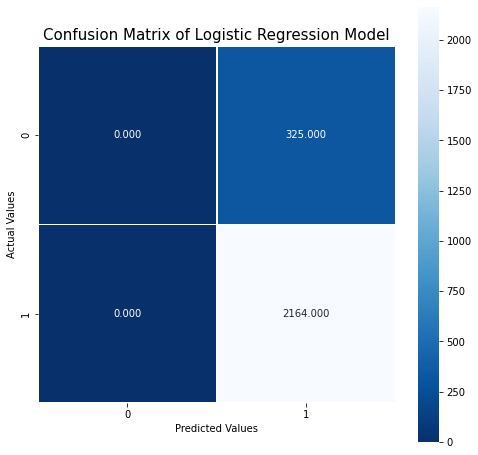

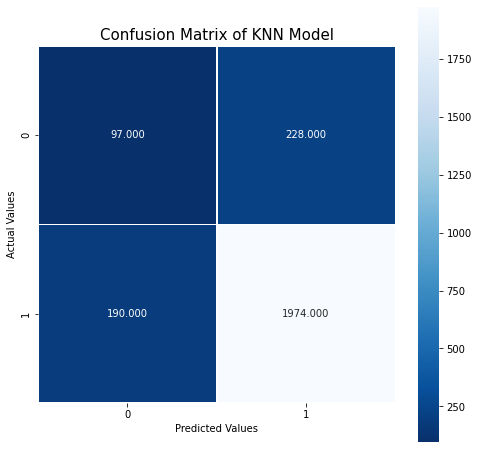

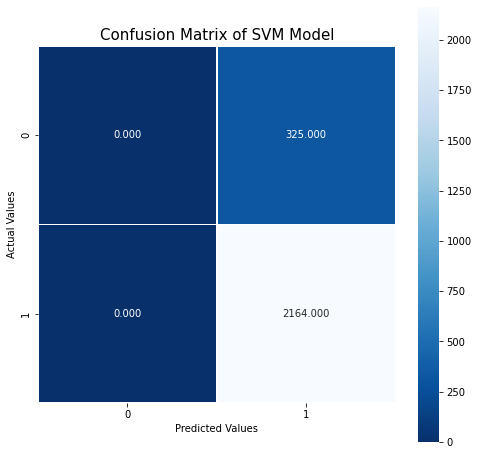

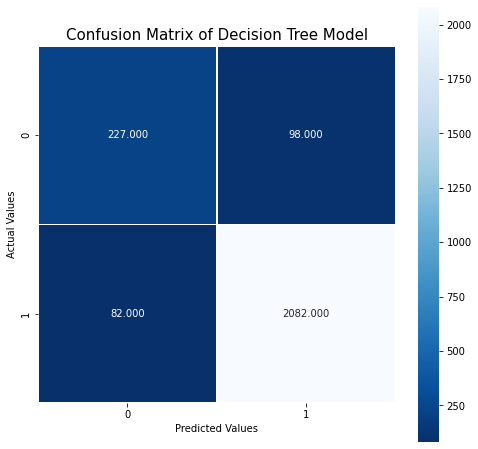

In [ ]:
def main():
  warnings.simplefilter('ignore')
  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)

  # Logistic Regression
  # Logistic Regression

  # Create logistic regression model 
  model_LR = LogisticRegression()
  # Train model
  model_LR.fit(X_train,y_train)
  # Test model
  y_true_LR, y_pred_LR = y_test, model_LR.predict(X_test)
  # Model evaluation
  print('Accuracy of Logistic Regression model: {:.3f}%'.format(accuracy_score(y_test, y_pred_LR) * 100))
  conf_LR = confusion_matrix(y_test, y_pred_LR)
  print(conf_LR)
  plt.figure(1,figsize=(8,8))
  sns.heatmap(conf_LR, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual Values');
  plt.xlabel('Predicted Values');
  plt.title('Confusion Matrix of Logistic Regression Model', size = 15);

  # KNN 
  # KNN
  # Create KNN Model
  model_KNN = KNeighborsClassifier()
  # Train model
  model_KNN.fit(X_train,y_train)
  # Test model
  y_true_KNN, y_pred_KNN = y_test, model_KNN.predict(X_test)
  # Model evaluation
  print('Accuracy of KNN model: {:.3f}%'.format(accuracy_score(y_test, y_pred_KNN) * 100))
  conf_KNN = confusion_matrix(y_test, y_pred_KNN)
  print(conf_KNN)
  plt.figure(2,figsize=(8,8))
  sns.heatmap(conf_KNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual Values');
  plt.xlabel('Predicted Values');
  plt.title('Confusion Matrix of KNN Model', size = 15);

  # SVM
  # SVM 
  model_SVM = svm.SVC()
  # Train model
  model_SVM.fit(X_train,y_train)
  # Test model
  y_true_SVM, y_pred_SVM = y_test, model_SVM.predict(X_test)
  # Model evaluation
  print('Accuracy of SVM model: {:.3f}%'.format(accuracy_score(y_test, y_pred_SVM) * 100))
  conf_SVM = confusion_matrix(y_test, y_pred_SVM)
  print(conf_SVM)
  plt.figure(3,figsize=(8,8))
  sns.heatmap(conf_SVM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual Values');
  plt.xlabel('Predicted Values');
  plt.title('Confusion Matrix of SVM Model', size = 15);

  # Decision Tree Classifier
  model_DT=DecisionTreeClassifier()
  # Train model
  model_DT.fit(X_train,y_train)
  # Test model
  y_true_DT, y_pred_DT = y_test, model_DT.predict(X_test)
  # Model evaluation
  print('Accuracy of Decision Tree model: {:.3f}%'.format(accuracy_score(y_test, y_pred_DT) * 100))
  conf_DT = confusion_matrix(y_test, y_pred_DT)
  print(conf_DT)
  plt.figure(4,figsize=(8,8))
  sns.heatmap(conf_DT, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual Values');
  plt.xlabel('Predicted Values');
  plt.title('Confusion Matrix of Decision Tree Model', size = 15);

if __name__ == '__main__':
  main()

**Question 2: Dimensionality Reduction Techniques **

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


 Decision Tree Classifier
Maximum accuracy is 95.7 % gotten using  3  components
Minmum accuracy is 90.64 % gotten using  9  components
Accuracy values %: [95.02, 95.02, 95.7, 95.06, 94.62, 95.46, 94.94, 93.77, 90.64, 93.53, 93.93]


100%|██████████| 500/500 [14:20<00:00,  1.72s/it]


Accuracy after using Autoencoder: 78.224%


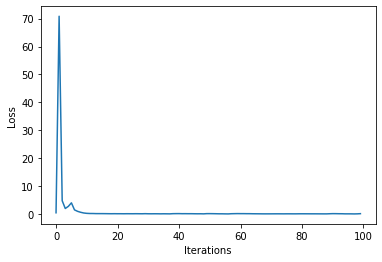

In [ ]:
def main():
  warnings.simplefilter('ignore')
  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)
  accuracy_DT = []

  # Using Principal Component Analysis to determine optimal number of components
  for count in range(1, len(features)+1):
    pca = PCA(n_components = count, random_state=0)
    X_train_new = pca.fit_transform(X_train)
    X_test_new = pca.transform(X_test)
    model_DT=DecisionTreeClassifier()
    model_DT.fit(X_train_new, y_train)

    # Predicting the Test set results
    y_pred_DT = model_DT.predict(X_test_new)
    accuracy_DT.append(accuracy_score(y_test, y_pred_DT)*100)
  print("\n Decision Tree Classifier")
  print("Maximum accuracy is", round(max(accuracy_DT),2), "% gotten using ", accuracy_DT.index(max(accuracy_DT)) + 1, " components")
  print("Minmum accuracy is", round(min(accuracy_DT),2), "% gotten using ", accuracy_DT.index(min(accuracy_DT)) + 1, " components")
  accuracy_LR = [round(value, 2) for value in accuracy_DT]
  print("Accuracy values %:", accuracy_LR)

  # Using Autoencoder
  model = AutoEncoder().cuda()
  # Validation using MSE Loss function 
  mse=torch.nn.MSELoss()
  # Using an Adam Optimizer with lr = 0.1
  optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1, weight_decay = 1e-8)
  t = MinMaxScaler()
  X_train = t.fit_transform(X_train)
  X_test = t.fit_transform(X_test)
  y_train = t.fit_transform(y_train)

  X_train_tensor = torch.Tensor(X_train)
  y_train_tensor = torch.Tensor(y_train)

  digit_dataset = TensorDataset(X_train_tensor, y_train_tensor)
  data_loader = DataLoader(digit_dataset, batch_size=60)
  epochs = 500
  outputs = []
  losses = []
  for epoch in tqdm(range(epochs)):
    for (image,_) in data_loader:
      # Output of Autoencoder
      reconstructed = model(image.cuda())
      
      # Calculating the loss function
      loss = mse(reconstructed, image.cuda())

      # The gradients are set to zero,
      # the the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # Storing the losses in a list for plotting
      losses.append(loss.item())
    outputs.append((epochs, image, reconstructed))

  # Defining the Plot Style
  plt.xlabel('Iterations')
  plt.ylabel('Loss')  
  # Plotting the last 100 values
  plt.plot(losses[:100])

  X_train_AE = model.encoder(torch.Tensor(X_train).cuda()).cpu().detach().numpy()
  X_test_AE = model.encoder(torch.Tensor(X_test).cuda()).cpu().detach().numpy()
  model_DT_AE = DecisionTreeClassifier()
  model_DT_AE.fit(X_train_AE, y_train)
  y_pred_AE = model_DT_AE.predict(X_test_AE)

  # Model evaluation
  print('Accuracy after using Autoencoder: {:.3f}%'.format(accuracy_score(y_test, y_pred_AE) * 100))
  conf_KNN = confusion_matrix(y_test, y_pred_AE)
  
if __name__ == '__main__':
  main()

**Question 2.2 Feature Selection **

Accuracy values using information gain %:  [77.5, 95.26, 96.67, 98.19, 97.71, 97.51, 93.13, 94.82, 92.17, 92.45, 92.45]


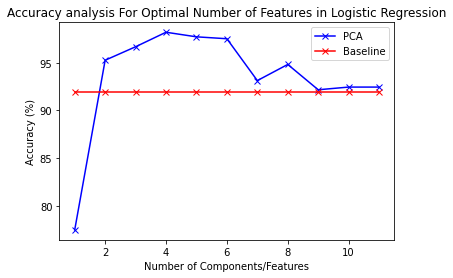

Accuracy values using Chi square %:  [86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 24.75, 85.82]
Accuracy values using Classif %:  [85.82, 85.82, 85.82, 85.82, 85.82, 85.82, 85.82, 85.82, 85.82, 85.82, 85.82]
[[ 301   24]
 [  27 2137]]


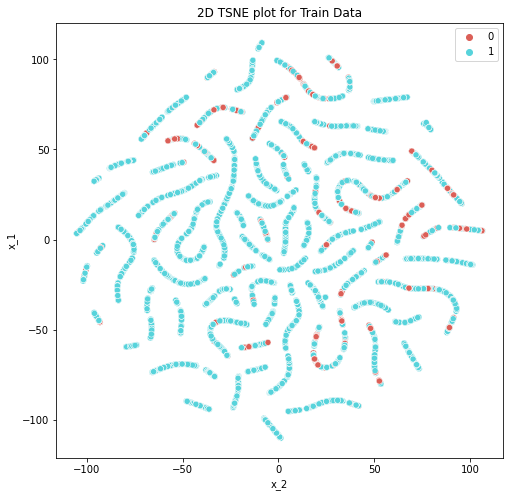

In [ ]:
def main():
  warnings.simplefilter('ignore')
  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)
  model_DT = DecisionTreeClassifier()
  model_DT.fit(X_train, y_train)
  y_pred_DT = model_DT.predict(X_test)
  accuracy_Base = [accuracy_score(y_test, y_pred_DT)*100]*len(features)
  accuracy_info_gain = []
  accuracy_chi = []
  accuracy_classif = []
  accuracy_regression = []

  for count in range(1, len(features)+1):
      fsm = SelectKBest(mutual_info_classif,k=count)
      fsm.fit(X_train,y_train)
      X_train_new = fsm.transform(X_train)
      X_test_new = fsm.transform(X_test)
      model_DT.fit(X_train_new, y_train)
      y_pred_DT = model_DT.predict(X_test_new)
      accuracy_info_gain.append(accuracy_score(y_test, y_pred_DT)*100)
      
  accuracy_info_gain = [round(value, 2) for value in accuracy_info_gain]
  print("Accuracy values using information gain %: ",accuracy_info_gain)
    
  plt.plot(range(1,len(features)+1),accuracy_info_gain,'bx-', label = 'PCA')
  plt.plot(range(1,len(features)+1),accuracy_Base,'rx-', label = 'Baseline')
  plt.legend()
  plt.xlabel('Number of Components/Features') 
  plt.ylabel('Accuracy (%)') 
  plt.title('Accuracy analysis For Optimal Number of Features in Logistic Regression')
  plt.show()
    
  scaler = MinMaxScaler()
  X_train_norm = scaler.fit_transform(X_train)

  for count in range(1, len(features)+1):
     fsm = SelectKBest(chi2,k=count)
     fsm.fit(X_train_norm,y_train)
     X_train_new = fsm.transform(X_train_norm)
     X_test_new = fsm.transform(X_test)
     model_DT.fit(X_train_new, y_train)
     y_pred_DT = model_DT.predict(X_test_new)
     accuracy_chi.append(accuracy_score(y_test, y_pred_DT)*100)
  accuracy_chi = [round(value, 2) for value in accuracy_chi]
  print("Accuracy values using Chi square %: ",accuracy_chi)

  for count in range(1, len(features)+1):
     fsm = SelectKBest(f_classif,k=count)
     fsm.fit(X_train,y_train)
     X_train_new = fsm.transform(X_train)
     X_test_new = fsm.transform(X_test)
     model_DT.fit(X_train_new, y_train)
     y_pred_LR = model_DT.predict(X_test_new)
     accuracy_classif.append(accuracy_score(y_test, y_pred_DT)*100)
  accuracy_classif = [round(value, 2) for value in accuracy_classif]
  print("Accuracy values using Classif %: ",accuracy_classif)

  
  fsm = SelectKBest(mutual_info_classif,k=4)
  fsm.fit(X_train,y_train)
  X_train_new = fsm.transform(X_train)
  X_test_new = fsm.transform(X_test)

  plt.figure(3,figsize=(8,8))
  plot_tsne(X_train_new,y_train,'Train Data')
  model_DT.fit(X_train_new, y_train)
  y_pred_DT = model_DT.predict(X_test_new)
  conf_DT= confusion_matrix(y_test, y_pred_DT)
  plt.figure(3,figsize=(8,8))
  print(conf_DT)

if __name__ == '__main__':
  main()


Accuracy of Random Forest model: 97.348%


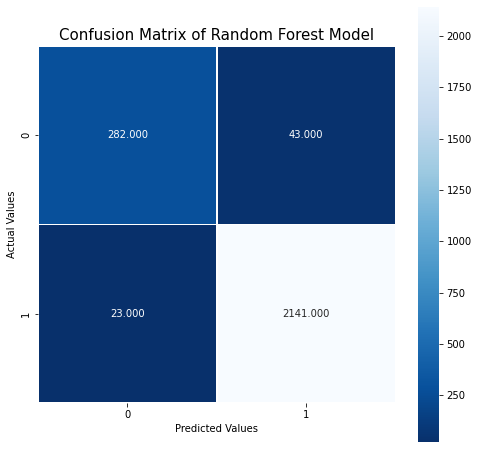

In [12]:
def main():
  warnings.simplefilter('ignore')
  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)
  
  model_RF = RandomForestClassifier()
  model_RF.fit(X_train,y_train)
  y_pred_RF = model_RF.predict(X_test)
  conf_RF= confusion_matrix(y_test, y_pred_RF)
  
  print('Accuracy of Random Forest model: {:.3f}%'.format(accuracy_score(y_test, y_pred_RF) * 100))
  plt.figure(1,figsize=(8,8))
  sns.heatmap(conf_RF, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual Values');
  plt.xlabel('Predicted Values');
  plt.title('Confusion Matrix of Random Forest Model', size = 15);

if __name__ == '__main__':
  main()

In [28]:
def main():
  warnings.simplefilter('ignore')

  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)
  X_train, y_train = RandomUnderSampler(sampling_strategy={0: 50}, random_state=0).fit_resample(X_train, y_train)

  for nEst in range(1, 20):
    estimator = BaggingClassifier(n_estimators=nEst)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
    # plotEstimator(X_train, y_train, X_test, y_test, estimator, f'Bagging {nEst}')

if __name__ == '__main__':
  main()

              precision    recall  f1-score   support

           0       0.86      0.24      0.38       325
           1       0.90      0.99      0.94      2164

    accuracy                           0.90      2489
   macro avg       0.88      0.62      0.66      2489
weighted avg       0.89      0.90      0.87      2489

              precision    recall  f1-score   support

           0       0.88      0.33      0.48       325
           1       0.91      0.99      0.95      2164

    accuracy                           0.91      2489
   macro avg       0.89      0.66      0.71      2489
weighted avg       0.90      0.91      0.89      2489

              precision    recall  f1-score   support

           0       0.93      0.13      0.22       325
           1       0.88      1.00      0.94      2164

    accuracy                           0.88      2489
   macro avg       0.91      0.56      0.58      2489
weighted avg       0.89      0.88      0.84      2489

              preci

In [30]:
def main():
  warnings.simplefilter('ignore')
  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)
  for nEst in [1, 100, 200, 300]:
    estimator = GradientBoostingClassifier(n_estimators=nEst)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
    # plotEstimator(X_train, y_train, X_test, y_test, estimator, f'Gradient Boosting {nEst}')

if __name__ == '__main__':
  main()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       325
           1       0.87      1.00      0.93      2164

    accuracy                           0.87      2489
   macro avg       0.43      0.50      0.47      2489
weighted avg       0.76      0.87      0.81      2489

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       325
           1       0.98      0.99      0.99      2164

    accuracy                           0.97      2489
   macro avg       0.95      0.94      0.94      2489
weighted avg       0.97      0.97      0.97      2489

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       325
           1       0.99      0.99      0.99      2164

    accuracy                           0.99      2489
   macro avg       0.98      0.98      0.98      2489
weighted avg       0.99      0.99      0.99      2489

              preci

In [33]:
def main():
  warnings.simplefilter('ignore')
  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)
  estimators = [
              ('dt', DecisionTreeClassifier()),
              ('svr', make_pipeline(StandardScaler(), LinearSVC()))]

  clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  report = classification_report(y_test, y_pred)
  print(report)
  # plotEstimator(X_train, y_train, X_test, y_test, estimator, f'Stacking Classifier')


if __name__ == '__main__':
  main()

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       325
           1       0.95      0.97      0.96      2164

    accuracy                           0.93      2489
   macro avg       0.86      0.82      0.84      2489
weighted avg       0.93      0.93      0.93      2489



**Parameter Tuning **

In [ ]:
def main():
  warnings.simplefilter('ignore')
  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)

  
